In [50]:
# Import pandas modules
import pandas as pd
import numpy as np
import json
import os
import datetime as dt
import time as time
from time import mktime
import matplotlib.pyplot as plt  
from itertools import cycle, islice
    

In [51]:
# Isolate data items
# Date Range B: Shutdown Operating Period 22nd Dec 2018 - 25th Jan 2019
# Sampled 8 days of the 35 days total
# Time Block: 2pm - 8pm
# Carrier: Delta Airlines (DL)
# Airports: MCO, ATL

# Data Fields: airport code, date, carrier code, 
# Filter by scheduledGateDeparture, actualGateDeparture

# Need catch issue with departure date roll over where departure start time is less than departure end time
# Need to identify duplicate flights across adjacent days
# Example is Historic_Request_ATL_20190122_14.json flight 268

Date_Range_B_df = pd.DataFrame(index=np.arange(0, 0), columns=('Counter', 'Airport', 'Flight', 'Destination', 'Scheduled', 'Actual', 'Delay', 'Tail') )
Flight_Counter = 0

Airports = ['ATL', 'MCO']
Date_Range_B_Dates = ['20190122', '20190123', '20190124', '20190125']

FileHeader = "Historic_Request_"
Break = "_"
Airport = "ATL"
Date_Range_B_Date = "20171222"
Daily_Start_Time = "14"
FileExt = ".json"

for Airport in Airports:
    
    for Date in Date_Range_B_Dates:
        Date_Range_B_Date = str(Date)
        JSON_File_Name = FileHeader + Airport + Break + Date_Range_B_Date + Break + Daily_Start_Time + FileExt
        #print(JSON_File_Name)

        # Identify data files
        filepath = os.path.join(JSON_File_Name)
        with open(filepath) as jsonfile:
            airport_data_json = json.load(jsonfile)

        json_file_data = airport_data_json['flightStatuses']

        for getFlight in json_file_data:
            Flight_Counter = Flight_Counter + 1
            print(f"Flight Counter: {Flight_Counter}")
            myFlightID = getFlight['flightId']
            #print(f"FlightID: {myFlightID}")
            myFlightArrivalAirport = getFlight['arrivalAirportFsCode']
            
            myFlightTailNumber = getFlight['flightEquipment']['tailNumber']
            print(f"Tail Number: {myFlightTailNumber}")
            myFlightCarrier = getFlight['carrierFsCode']
            myFlightNum = getFlight['flightNumber']
            print(f"Airline Flight#: {myFlightCarrier}{myFlightNum}")
            myFlightDepAirport = getFlight['departureAirportFsCode']
            print(f"Airport: {myFlightDepAirport}")
            print(f"Departing To: {myFlightArrivalAirport}")
            myFlightDepDateTime = getFlight['departureDate']['dateLocal']
            myFlightDepDate = myFlightDepDateTime.split("T")[0]
            print(f"Date: {myFlightDepDate}")
            myFlightStatus = getFlight['status']
            #print(f"Status: {myFlightStatus}")
    
            try:
                myFlightScheduledDep = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
            
                print(f"Scheduled Departure: {myFlightScheduledDep}")
                #print(f"Scheduled Dep Time: {myFlightScheduledDepTime} Hour: {myFlightShedDepHour} Minutes: {myFlightShedDepMinutes}")
    
                myFlightActualDep = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
        
                print(f"Actual Departure: {myFlightActualDep}")
        
                myFlightScheduledUTC = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
                myFlightScheduledUTC = myFlightScheduledUTC.split(":00.")[0]
                myFlightScheduled = myFlightScheduledUTC.replace("T", " ")
                myFlightScheduled = myFlightScheduled.replace("-", " ")
                myScheduled = myFlightScheduled.replace(":", " ")
    
                myScheduled_struct = time.strptime(str(myScheduled), '%Y %m %d %H %M')
                myScheduled_dt = dt.datetime.fromtimestamp(mktime(myScheduled_struct))
                start = myScheduled_dt
        
                myFlightActualUTC = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
                myFlightActualUTC = myFlightActualUTC.split(":00.")[0]
                myFlightActual = myFlightActualUTC.replace("T", " ")
                myFlightActual = myFlightActual.replace("-", " ")
                myActual = myFlightActual.replace(":", " ")
                myActual_struct = time.strptime(str(myActual), '%Y %m %d %H %M')
                myActual_dt = dt.datetime.fromtimestamp(mktime(myActual_struct))
                end = myActual_dt
        
                if end > start:
                    time_difference = (end - start)
                    print(f"Flight Departure Delayed by (H:M:S): {time_difference}")
                    TimeDelta = int(time_difference.total_seconds()) / 60
                else:
                    time_difference = (start - end)
                    if start == end:
                        TimeDelta = 0
                        print("Flight Departed On Time!")
                    else:
                        print(f"Flight Departed Early by (H:M:S): {time_difference}")
                        TimeDelta = int(time_difference.total_seconds()) / 60 * -1
                
                print(f"Departure Time Delta (minutes): {TimeDelta}")
                myFlightDelayMinutes = TimeDelta
        
            except:
                print(f"No Gate Depature Delay Data")
                myFlightDelayMinutes = 0
                print(f"Delay (Minutes): {myFlightDelayMinutes}")
                time_difference = 0
                print("Flight Departed On Time!")
                TimeDelta = 0
                print(f"Departure Time Delta (minutes): {TimeDelta}")
        
        
            print("\n")
            Date_Range_B_df.loc[Flight_Counter] = [Flight_Counter, myFlightDepAirport, myFlightNum, myFlightArrivalAirport, myFlightScheduledDep, myFlightActualDep, myFlightDelayMinutes, myFlightTailNumber]


Flight Counter: 1
Tail Number: N913DE
Airline Flight#: DL1675
Airport: ATL
Departing To: ORD
Date: 2019-01-22
Scheduled Departure: 2019-01-22T12:59:00.000
Actual Departure: 2019-01-22T20:39:00.000
Flight Departure Delayed by (H:M:S): 7:40:00
Departure Time Delta (minutes): 460.0


Flight Counter: 2
Tail Number: N306DQ
Airline Flight#: DL9936
Airport: ATL
Departing To: MSP
Date: 2019-01-22
Scheduled Departure: 2019-01-22T13:00:00.000
Actual Departure: 2019-01-22T17:52:00.000
Flight Departure Delayed by (H:M:S): 4:52:00
Departure Time Delta (minutes): 292.0


Flight Counter: 3
Tail Number: N922DX
Airline Flight#: DL1311
Airport: ATL
Departing To: SAT
Date: 2019-01-22
Scheduled Departure: 2019-01-22T13:22:00.000
Actual Departure: 2019-01-22T14:10:00.000
Flight Departure Delayed by (H:M:S): 0:48:00
Departure Time Delta (minutes): 48.0


Flight Counter: 4
Tail Number: N835MH
Airline Flight#: DL1992
Airport: ATL
Departing To: JFK
Date: 2019-01-22
Scheduled Departure: 2019-01-22T13:41:00.000


Flight Counter: 71
Tail Number: N983DL
Airline Flight#: DL1670
Airport: ATL
Departing To: IAD
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:07:00.000
Actual Departure: 2019-01-22T15:06:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 72
Tail Number: N984DL
Airline Flight#: DL2375
Airport: ATL
Departing To: DSM
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:07:00.000
Actual Departure: 2019-01-22T15:03:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 73
Tail Number: N997DL
Airline Flight#: DL1350
Airport: ATL
Departing To: MSN
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:07:00.000
Actual Departure: 2019-01-22T15:06:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 74
Tail Number: N915DE
Airline Flight#: DL2359
Airport: ATL
Departing To: HSV
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:08:00.000
Actual 

Flight Departure Delayed by (H:M:S): 0:08:00
Departure Time Delta (minutes): 8.0


Flight Counter: 126
Tail Number: N945AT
Airline Flight#: DL1362
Airport: ATL
Departing To: TYS
Date: 2019-01-22
Scheduled Departure: 2019-01-22T16:24:00.000
Actual Departure: 2019-01-22T16:21:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 127
Tail Number: N963DL
Airline Flight#: DL1652
Airport: ATL
Departing To: BUF
Date: 2019-01-22
Scheduled Departure: 2019-01-22T16:24:00.000
Actual Departure: 2019-01-22T16:20:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 128
Tail Number: N551NW
Airline Flight#: DL1126
Airport: ATL
Departing To: FLL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T16:27:00.000
Actual Departure: 2019-01-22T16:25:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 129
Tail Number: N904DL
Airline Flight#: DL2427
Airport: ATL


Flight Counter: 183
Tail Number: N943AT
Airline Flight#: DL2438
Airport: ATL
Departing To: CLT
Date: 2019-01-22
Scheduled Departure: 2019-01-22T17:46:00.000
Actual Departure: 2019-01-22T17:47:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 184
Tail Number: N962DN
Airline Flight#: DL1725
Airport: ATL
Departing To: IAH
Date: 2019-01-22
Scheduled Departure: 2019-01-22T17:46:00.000
Actual Departure: 2019-01-22T17:44:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 185
Tail Number: N950DL
Airline Flight#: DL2419
Airport: ATL
Departing To: ORD
Date: 2019-01-22
Scheduled Departure: 2019-01-22T17:48:00.000
Actual Departure: 2019-01-23T00:54:00.000
Flight Departure Delayed by (H:M:S): 7:06:00
Departure Time Delta (minutes): 426.0


Flight Counter: 186
Tail Number: N945DN
Airline Flight#: DL1672
Airport: ATL
Departing To: EWR
Date: 2019-01-22
Scheduled Departure: 2019-01-22T17:48:00.0

Flight Counter: 244
Tail Number: N863DN
Airline Flight#: DL792
Airport: ATL
Departing To: SFO
Date: 2019-01-22
Scheduled Departure: 2019-01-22T19:09:00.000
Actual Departure: 2019-01-22T19:10:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 245
Tail Number: N907DL
Airline Flight#: DL1653
Airport: ATL
Departing To: BNA
Date: 2019-01-22
Scheduled Departure: 2019-01-22T19:09:00.000
Actual Departure: 2019-01-22T19:09:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 246
Tail Number: N348DN
Airline Flight#: DL2874
Airport: ATL
Departing To: SLC
Date: 2019-01-22
Scheduled Departure: 2019-01-22T19:11:00.000
Actual Departure: 2019-01-22T19:09:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 247
Tail Number: N390DA
Airline Flight#: DL1974
Airport: ATL
Departing To: GPT
Date: 2019-01-22
Scheduled Departure: 2019-01-22T19:15:00.000
Actual Departure: 2019

Flight Counter: 289
Tail Number: N669DN
Airline Flight#: DL2673
Airport: ATL
Departing To: DTW
Date: 2019-01-23
Scheduled Departure: 2019-01-23T11:04:00.000
Actual Departure: 2019-01-23T11:58:00.000
Flight Departure Delayed by (H:M:S): 0:54:00
Departure Time Delta (minutes): 54.0


Flight Counter: 290
Tail Number: N996AT
Airline Flight#: DL2011
Airport: ATL
Departing To: GSO
Date: 2019-01-23
Scheduled Departure: 2019-01-23T12:14:00.000
Actual Departure: 2019-01-23T14:22:00.000
Flight Departure Delayed by (H:M:S): 2:08:00
Departure Time Delta (minutes): 128.0


Flight Counter: 291
Tail Number: N999DN
Airline Flight#: DL1675
Airport: ATL
Departing To: ORD
Date: 2019-01-23
Scheduled Departure: 2019-01-23T12:59:00.000
Actual Departure: 2019-01-23T13:44:00.000
Flight Departure Delayed by (H:M:S): 0:45:00
Departure Time Delta (minutes): 45.0


Flight Counter: 292
Tail Number: N333DX
Airline Flight#: DL2858
Airport: ATL
Departing To: LGA
Date: 2019-01-23
Scheduled Departure: 2019-01-23T13:30:

Flight Counter: 360
Tail Number: N309DE
Airline Flight#: DL1784
Airport: ATL
Departing To: EYW
Date: 2019-01-23
Scheduled Departure: 2019-01-23T15:05:00.000
Actual Departure: 2019-01-23T15:12:00.000
Flight Departure Delayed by (H:M:S): 0:07:00
Departure Time Delta (minutes): 7.0


Flight Counter: 361
Tail Number: N3740C
Airline Flight#: DL1309
Airport: ATL
Departing To: PHL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T15:06:00.000
Actual Departure: 2019-01-23T15:02:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 362
Tail Number: N908DA
Airline Flight#: DL2617
Airport: ATL
Departing To: BWI
Date: 2019-01-23
Scheduled Departure: 2019-01-23T15:06:00.000
Actual Departure: 2019-01-23T15:04:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 363
Tail Number: N954DL
Airline Flight#: DL2318
Airport: ATL
Departing To: CLE
Date: 2019-01-23
Scheduled Departure: 2019-01-23T15:06:00.000
A

Actual Departure: 2019-01-23T16:20:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 416
Tail Number: N687DL
Airline Flight#: DL970
Airport: ATL
Departing To: RSW
Date: 2019-01-23
Scheduled Departure: 2019-01-23T16:22:00.000
Actual Departure: 2019-01-23T16:26:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 417
Tail Number: N338NW
Airline Flight#: DL1346
Airport: ATL
Departing To: MIA
Date: 2019-01-23
Scheduled Departure: 2019-01-23T16:22:00.000
Actual Departure: 2019-01-23T17:30:00.000
Flight Departure Delayed by (H:M:S): 1:08:00
Departure Time Delta (minutes): 68.0


Flight Counter: 418
Tail Number: N864DN
Airline Flight#: DL887
Airport: ATL
Departing To: PDX
Date: 2019-01-23
Scheduled Departure: 2019-01-23T16:23:00.000
Actual Departure: 2019-01-23T16:23:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 419
Tail Number: N943AT
Airline Flight

Actual Departure: 2019-01-23T17:45:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 478
Tail Number: N921DN
Airline Flight#: DL1725
Airport: ATL
Departing To: IAH
Date: 2019-01-23
Scheduled Departure: 2019-01-23T17:46:00.000
Actual Departure: 2019-01-23T17:43:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 479
Tail Number: N895AT
Airline Flight#: DL2438
Airport: ATL
Departing To: CLT
Date: 2019-01-23
Scheduled Departure: 2019-01-23T17:46:00.000
Actual Departure: 2019-01-23T17:43:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 480
Tail Number: N936DN
Airline Flight#: DL1672
Airport: ATL
Departing To: EWR
Date: 2019-01-23
Scheduled Departure: 2019-01-23T17:48:00.000
Actual Departure: 2019-01-23T19:33:00.000
Flight Departure Delayed by (H:M:S): 1:45:00
Departure Time Delta (minutes): 105.0


Flight Counter: 481
Tail Number: N950DL
Airline Fligh

Date: 2019-01-23
Scheduled Departure: 2019-01-23T19:00:00.000
Actual Departure: 2019-01-23T19:44:00.000
Flight Departure Delayed by (H:M:S): 0:44:00
Departure Time Delta (minutes): 44.0


Flight Counter: 535
Tail Number: N302DN
Airline Flight#: DL1435
Airport: ATL
Departing To: PHX
Date: 2019-01-23
Scheduled Departure: 2019-01-23T19:01:00.000
Actual Departure: 2019-01-23T20:26:00.000
Flight Departure Delayed by (H:M:S): 1:25:00
Departure Time Delta (minutes): 85.0


Flight Counter: 536
Tail Number: N895AT
Airline Flight#: DL2290
Airport: ATL
Departing To: AVL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T19:02:00.000
Actual Departure: 2019-01-24T05:58:00.000
Flight Departure Delayed by (H:M:S): 10:56:00
Departure Time Delta (minutes): 656.0


Flight Counter: 537
Tail Number: N3762Y
Airline Flight#: DL1293
Airport: ATL
Departing To: TRI
Date: 2019-01-23
Scheduled Departure: 2019-01-23T19:03:00.000
Actual Departure: 2019-01-23T19:02:00.000
Flight Departed Early by (H:M:S): 0:01:00
Dep

Flight Counter: 584
Tail Number: N331DN
Airline Flight#: DL2914
Airport: ATL
Departing To: LGA
Date: 2019-01-24
Scheduled Departure: 2019-01-24T11:30:00.000
Actual Departure: 2019-01-24T14:28:00.000
Flight Departure Delayed by (H:M:S): 2:58:00
Departure Time Delta (minutes): 178.0


Flight Counter: 585
Tail Number: N841DN
Airline Flight#: DL2486
Airport: ATL
Departing To: JFK
Date: 2019-01-24
Scheduled Departure: 2019-01-24T12:05:00.000
Actual Departure: 2019-01-24T14:35:00.000
Flight Departure Delayed by (H:M:S): 2:30:00
Departure Time Delta (minutes): 150.0


Flight Counter: 586
Tail Number: N988DL
Airline Flight#: DL425
Airport: ATL
Departing To: STL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T12:10:00.000
Actual Departure: 2019-01-24T13:44:00.000
Flight Departure Delayed by (H:M:S): 1:34:00
Departure Time Delta (minutes): 94.0


Flight Counter: 587
Tail Number: N548US
Airline Flight#: DL1219
Airport: ATL
Departing To: LAX
Date: 2019-01-24
Scheduled Departure: 2019-01-24T12:27:

Flight Counter: 656
Tail Number: N544US
Airline Flight#: DL1048
Airport: ATL
Departing To: BNA
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:00:00.000
Actual Departure: 2019-01-24T16:09:00.000
Flight Departure Delayed by (H:M:S): 1:09:00
Departure Time Delta (minutes): 69.0


Flight Counter: 657
Tail Number: N103DU
Airline Flight#: DL9968
Airport: ATL
Departing To: CVG
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:00:00.000
No Gate Depature Delay Data
Delay (Minutes): 0
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 658
Tail Number: N104DU
Airline Flight#: DL9961
Airport: ATL
Departing To: MSP
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:00:00.000
Actual Departure: 2019-01-24T16:28:00.000
Flight Departure Delayed by (H:M:S): 1:28:00
Departure Time Delta (minutes): 88.0


Flight Counter: 659
Tail Number: N101DU
Airline Flight#: DL9966
Airport: ATL
Departing To: IAH
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:00:00.000
Actual Depar

Flight Counter: 715
Tail Number: N864DA
Airline Flight#: DL82
Airport: ATL
Departing To: CDG
Date: 2019-01-24
Scheduled Departure: 2019-01-24T16:10:00.000
Actual Departure: 2019-01-24T16:22:00.000
Flight Departure Delayed by (H:M:S): 0:12:00
Departure Time Delta (minutes): 12.0


Flight Counter: 716
Tail Number: N357NB
Airline Flight#: DL2548
Airport: ATL
Departing To: JFK
Date: 2019-01-24
Scheduled Departure: 2019-01-24T16:10:00.000
Actual Departure: 2019-01-24T18:13:00.000
Flight Departure Delayed by (H:M:S): 2:03:00
Departure Time Delta (minutes): 123.0


Flight Counter: 717
Tail Number: N989DL
Airline Flight#: DL827
Airport: ATL
Departing To: RIC
Date: 2019-01-24
Scheduled Departure: 2019-01-24T16:13:00.000
Actual Departure: 2019-01-24T16:11:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 718
Tail Number: N608AT
Airline Flight#: DL2055
Airport: ATL
Departing To: DAL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T16:20:00.000

Date: 2019-01-24
Scheduled Departure: 2019-01-24T17:01:00.000
Actual Departure: 2019-01-24T16:59:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 762
Tail Number: N892AT
Airline Flight#: DL1997
Airport: ATL
Departing To: GSO
Date: 2019-01-24
Scheduled Departure: 2019-01-24T17:02:00.000
Actual Departure: 2019-01-24T16:59:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 763
Tail Number: N988AT
Airline Flight#: DL1791
Airport: ATL
Departing To: MDW
Date: 2019-01-24
Scheduled Departure: 2019-01-24T17:08:00.000
Actual Departure: 2019-01-24T17:03:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 764
Tail Number: N999DN
Airline Flight#: DL1075
Airport: ATL
Departing To: CHS
Date: 2019-01-24
Scheduled Departure: 2019-01-24T17:10:00.000
Actual Departure: 2019-01-24T17:22:00.000
Flight Departure Delayed by (H:M:S): 0:12:00
Departure T

Flight Counter: 819
Tail Number: N315NB
Airline Flight#: DL881
Airport: ATL
Departing To: ROA
Date: 2019-01-24
Scheduled Departure: 2019-01-24T18:18:00.000
Actual Departure: 2019-01-24T18:26:00.000
Flight Departure Delayed by (H:M:S): 0:08:00
Departure Time Delta (minutes): 8.0


Flight Counter: 820
Tail Number: N986AT
Airline Flight#: DL753
Airport: ATL
Departing To: MTY
Date: 2019-01-24
Scheduled Departure: 2019-01-24T18:20:00.000
Actual Departure: 2019-01-24T18:22:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 821
Tail Number: N347NB
Airline Flight#: DL337
Airport: ATL
Departing To: NAS
Date: 2019-01-24
Scheduled Departure: 2019-01-24T18:21:00.000
Actual Departure: 2019-01-24T19:17:00.000
Flight Departure Delayed by (H:M:S): 0:56:00
Departure Time Delta (minutes): 56.0


Flight Counter: 822
Tail Number: N705DN
Airline Flight#: DL200
Airport: ATL
Departing To: JNB
Date: 2019-01-24
Scheduled Departure: 2019-01-24T18:22:00.000


Flight Counter: 878
Tail Number: N810DN
Airline Flight#: DL823
Airport: ATL
Departing To: RIC
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:40:00.000
Actual Departure: 2019-01-24T19:35:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 879
Tail Number: N907DA
Airline Flight#: DL2199
Airport: ATL
Departing To: GSP
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:41:00.000
Actual Departure: 2019-01-24T20:17:00.000
Flight Departure Delayed by (H:M:S): 0:36:00
Departure Time Delta (minutes): 36.0


Flight Counter: 880
Tail Number: N916DE
Airline Flight#: DL1516
Airport: ATL
Departing To: VPS
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:44:00.000
Actual Departure: 2019-01-24T19:43:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 881
Tail Number: N346DN
Airline Flight#: DL2799
Airport: ATL
Departing To: MSP
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:44:00.000
A

Flight Counter: 920
Tail Number: N668DN
Airline Flight#: DL1117
Airport: ATL
Departing To: FLL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T14:00:00.000
Actual Departure: 2019-01-25T13:59:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 921
Tail Number: N942AT
Airline Flight#: DL1534
Airport: ATL
Departing To: OKC
Date: 2019-01-25
Scheduled Departure: 2019-01-25T14:02:00.000
Actual Departure: 2019-01-25T15:25:00.000
Flight Departure Delayed by (H:M:S): 1:23:00
Departure Time Delta (minutes): 83.0


Flight Counter: 922
Tail Number: N897DN
Airline Flight#: DL2819
Airport: ATL
Departing To: MSP
Date: 2019-01-25
Scheduled Departure: 2019-01-25T14:02:00.000
Actual Departure: 2019-01-25T14:07:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 923
Tail Number: N557NW
Airline Flight#: DL2982
Airport: ATL
Departing To: STL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T14:04:00.00

Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:16:00.000
Actual Departure: 2019-01-25T15:29:00.000
Flight Departure Delayed by (H:M:S): 0:13:00
Departure Time Delta (minutes): 13.0


Flight Counter: 989
Tail Number: N333DX
Airline Flight#: DL2198
Airport: ATL
Departing To: DCA
Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:17:00.000
Actual Departure: 2019-01-25T15:13:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 990
Tail Number: N958DL
Airline Flight#: DL2073
Airport: ATL
Departing To: MLB
Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:18:00.000
Actual Departure: 2019-01-25T15:12:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 991
Tail Number: N315NB
Airline Flight#: DL1680
Airport: ATL
Departing To: IAH
Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:19:00.000
Actual Departure: 2019-01-25T15:36:00.000
Flight Departure Delayed by (H:M:S): 0:17:00
Departur

Flight Counter: 1044
Tail Number: N6709
Airline Flight#: DL2861
Airport: ATL
Departing To: SLC
Date: 2019-01-25
Scheduled Departure: 2019-01-25T16:33:00.000
Actual Departure: 2019-01-25T16:36:00.000
Flight Departure Delayed by (H:M:S): 0:03:00
Departure Time Delta (minutes): 3.0


Flight Counter: 1045
Tail Number: N953DL
Airline Flight#: DL2024
Airport: ATL
Departing To: DAY
Date: 2019-01-25
Scheduled Departure: 2019-01-25T16:35:00.000
Actual Departure: 2019-01-25T16:40:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 1046
Tail Number: N912DE
Airline Flight#: DL2162
Airport: ATL
Departing To: CHA
Date: 2019-01-25
Scheduled Departure: 2019-01-25T16:35:00.000
Actual Departure: 2019-01-25T16:35:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1047
Tail Number: N326US
Airline Flight#: DL2804
Airport: ATL
Departing To: MSP
Date: 2019-01-25
Scheduled Departure: 2019-01-25T16:35:00.000
Actual Departure

Flight Counter: 1102
Tail Number: N991DL
Airline Flight#: DL2012
Airport: ATL
Departing To: JAN
Date: 2019-01-25
Scheduled Departure: 2019-01-25T17:52:00.000
Actual Departure: 2019-01-25T17:59:00.000
Flight Departure Delayed by (H:M:S): 0:07:00
Departure Time Delta (minutes): 7.0


Flight Counter: 1103
Tail Number: N704DK
Airline Flight#: DL195
Airport: ATL
Departing To: LAX
Date: 2019-01-25
Scheduled Departure: 2019-01-25T17:55:00.000
Actual Departure: 2019-01-25T18:18:00.000
Flight Departure Delayed by (H:M:S): 0:23:00
Departure Time Delta (minutes): 23.0


Flight Counter: 1104
Tail Number: N554NW
Airline Flight#: DL1153
Airport: ATL
Departing To: MCO
Date: 2019-01-25
Scheduled Departure: 2019-01-25T17:55:00.000
Actual Departure: 2019-01-25T17:55:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1105
Tail Number: N695DL
Airline Flight#: DL325
Airport: ATL
Departing To: SJO
Date: 2019-01-25
Scheduled Departure: 2019-01-25T17:56:00.000
Actual Departure

Flight Counter: 1159
Tail Number: N361NW
Airline Flight#: DL1323
Airport: ATL
Departing To: MIA
Date: 2019-01-25
Scheduled Departure: 2019-01-25T19:15:00.000
Actual Departure: 2019-01-25T19:16:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 1160
Tail Number: N3744F
Airline Flight#: DL1974
Airport: ATL
Departing To: GPT
Date: 2019-01-25
Scheduled Departure: 2019-01-25T19:15:00.000
Actual Departure: 2019-01-25T19:24:00.000
Flight Departure Delayed by (H:M:S): 0:09:00
Departure Time Delta (minutes): 9.0


Flight Counter: 1161
Tail Number: N584NW
Airline Flight#: DL2126
Airport: ATL
Departing To: LAX
Date: 2019-01-25
Scheduled Departure: 2019-01-25T19:17:00.000
Actual Departure: 2019-01-25T19:16:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1162
Tail Number: N340NB
Airline Flight#: DL316
Airport: ATL
Departing To: MEX
Date: 2019-01-25
Scheduled Departure: 2019-01-25T19:19:00.

Flight Counter: 1204
Tail Number: N392DA
Airline Flight#: DL2867
Airport: MCO
Departing To: CVG
Date: 2019-01-22
Scheduled Departure: 2019-01-22T13:30:00.000
Actual Departure: 2019-01-22T15:24:00.000
Flight Departure Delayed by (H:M:S): 1:54:00
Departure Time Delta (minutes): 114.0


Flight Counter: 1205
Tail Number: N554NW
Airline Flight#: DL1083
Airport: MCO
Departing To: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T14:25:00.000
Actual Departure: 2019-01-22T14:20:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1206
Tail Number: N671DN
Airline Flight#: DL1737
Airport: MCO
Departing To: DTW
Date: 2019-01-22
Scheduled Departure: 2019-01-22T14:26:00.000
Actual Departure: 2019-01-22T14:19:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 1207
Tail Number: N581NW
Airline Flight#: DL1761
Airport: MCO
Departing To: MSP
Date: 2019-01-22
Scheduled Departure: 2019-01-22T14:26:00

Departing To: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T16:25:00.000
Actual Departure: 2019-01-24T16:27:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 1262
Tail Number: N603AT
Airline Flight#: DL1059
Airport: MCO
Departing To: RDU
Date: 2019-01-24
Scheduled Departure: 2019-01-24T16:30:00.000
Actual Departure: 2019-01-24T16:36:00.000
Flight Departure Delayed by (H:M:S): 0:06:00
Departure Time Delta (minutes): 6.0


Flight Counter: 1263
Tail Number: N583NW
Airline Flight#: DL1930
Airport: MCO
Departing To: DTW
Date: 2019-01-24
Scheduled Departure: 2019-01-24T16:31:00.000
Actual Departure: 2019-01-24T16:28:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1264
Tail Number: N554NW
Airline Flight#: DL1335
Airport: MCO
Departing To: SLC
Date: 2019-01-24
Scheduled Departure: 2019-01-24T16:54:00.000
Actual Departure: 2019-01-24T17:01:00.000
Flight Departure Delayed by (H:

In [52]:
# Summarize Date Range B
print(f"\nRecipricol Airport Departure Delays between ATL and MCO for Date Range B Final Week\n")

Sum_ATL_Delays = ((Date_Range_B_df['Airport'] == 'ATL') & (Date_Range_B_df['Delay'] > 0)).sum()
print(f"Total Departures Delayed in ATL: {Sum_ATL_Delays}")

Sum_MCO_Bound_Delays = ((Date_Range_B_df['Airport'] == 'ATL') & (Date_Range_B_df['Destination'] == 'MCO') & (Date_Range_B_df['Delay'] > 0)).sum()
print(f"Total MCO Bound Departures Delayed in ATL: {Sum_MCO_Bound_Delays}")

Range_B_MCO_Bound_df = Date_Range_B_df[(Date_Range_B_df['Airport'] == 'ATL') & (Date_Range_B_df['Destination'] == 'MCO') & (Date_Range_B_df['Delay'] > 0)]

Sum_MCO_Delays = ((Date_Range_B_df['Airport'] == 'MCO') & (Date_Range_B_df['Delay'] > 0)).sum()
print(f"Total Departures Delayed in MCO: {Sum_MCO_Delays}")

Sum_ATL_Bound_Delays = ((Date_Range_B_df['Airport'] == 'MCO') & (Date_Range_B_df['Destination'] == 'ATL') & (Date_Range_B_df['Delay'] > 0)).sum()
print(f"Total ATL Bound Departures Delayed in MCO: {Sum_ATL_Bound_Delays}")

Range_B_ATL_Bound_df = Date_Range_B_df[(Date_Range_B_df['Airport'] == 'MCO') & (Date_Range_B_df['Destination'] == 'ATL') & (Date_Range_B_df['Delay'] > 0)]

Sum_Departures = Date_Range_B_df.count()
Total_Departures = Sum_Departures['Counter']
print(f"Total Departures: {Total_Departures}\n")

Range_B_MCO_Bound_df







Recipricol Airport Departure Delays between ATL and MCO for Date Range B Final Week

Total Departures Delayed in ATL: 574
Total MCO Bound Departures Delayed in ATL: 14
Total Departures Delayed in MCO: 52
Total ATL Bound Departures Delayed in MCO: 16
Total Departures: 1300



,Counter,Airport,Flight,Destination,Scheduled,Actual,Delay,Tail
110,110,ATL,186,MCO,2019-01-22T15:55:00.000,2019-01-22T15:57:00.000,2.0,N538US
235,235,ATL,1155,MCO,2019-01-22T18:56:00.000,2019-01-22T19:11:00.000,15.0,N590NW
282,282,ATL,1166,MCO,2019-01-22T19:55:00.000,2019-01-22T19:58:00.000,3.0,N688DL
306,306,ATL,1099,MCO,2019-01-23T13:55:00.000,2019-01-23T13:59:00.000,4.0,N1402A
342,342,ATL,1093,MCO,2019-01-23T14:55:00.000,2019-01-23T15:00:00.000,5.0,N668DN
578,578,ATL,1166,MCO,2019-01-23T19:55:00.000,2019-01-23T20:18:00.000,23.0,N584NW
607,607,ATL,1099,MCO,2019-01-24T13:55:00.000,2019-01-24T13:56:00.000,1.0,N695DL
646,646,ATL,1093,MCO,2019-01-24T14:55:00.000,2019-01-24T14:56:00.000,1.0,N550NW
708,708,ATL,186,MCO,2019-01-24T15:55:00.000,2019-01-24T16:11:00.000,16.0,N542US
795,795,ATL,1153,MCO,2019-01-24T17:55:00.000,2019-01-24T18:04:00.000,9.0,N6711M


In [53]:
Range_B_ATL_Bound_df




,Counter,Airport,Flight,Destination,Scheduled,Actual,Delay,Tail
1208,1208,MCO,1095,ATL,2019-01-22T15:25:00.000,2019-01-22T15:28:00.000,3.0,N6716C
1221,1221,MCO,1158,ATL,2019-01-22T19:25:00.000,2019-01-22T20:03:00.000,38.0,N6701
1225,1225,MCO,1179,ATL,2019-01-23T08:25:00.000,2019-01-23T14:10:00.000,345.0,N685DA
1227,1227,MCO,1080,ATL,2019-01-23T13:25:00.000,2019-01-23T13:51:00.000,26.0,N687DL
1228,1228,MCO,1083,ATL,2019-01-23T14:25:00.000,2019-01-23T19:36:00.000,311.0,N683DA
1229,1229,MCO,1083,ATL,2019-01-23T14:25:00.000,2019-01-23T21:31:00.000,426.0,N683DA
1237,1237,MCO,1099,ATL,2019-01-23T16:25:00.000,2019-01-23T16:30:00.000,5.0,N1402A
1241,1241,MCO,1093,ATL,2019-01-23T17:25:00.000,2019-01-23T17:26:00.000,1.0,N668DN
1242,1242,MCO,1073,ATL,2019-01-23T18:25:00.000,2019-01-23T18:44:00.000,19.0,N549US
1246,1246,MCO,1158,ATL,2019-01-23T19:25:00.000,2019-01-23T21:48:00.000,143.0,N669DN


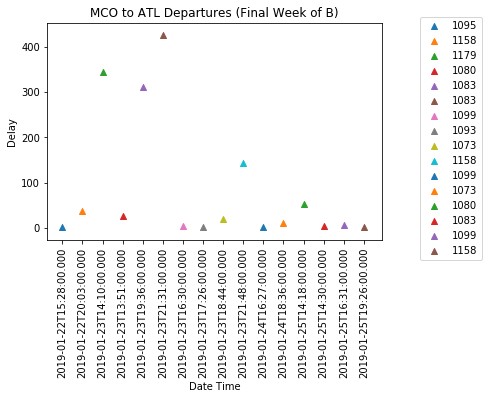

In [56]:
# Plot MCO-ATL and ATL-MCO Date Range B Final Week Departures

N = len(Range_B_ATL_Bound_df['Actual'])
fig, ax = plt.subplots()
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, N))
ax.set_xlabel('Date Time')
ax.set_ylabel('Delay')

for x,y,c,lb in zip(Range_B_ATL_Bound_df['Actual'], Range_B_ATL_Bound_df['Delay'], Range_B_ATL_Bound_df['Counter'], Range_B_ATL_Bound_df['Flight']):
    ax.scatter(x, y, marker='^', label=lb)
ax.legend(Range_B_ATL_Bound_df['Flight'],loc="best")
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.xticks(rotation='vertical')
plt.title("MCO to ATL Departures (Final Week of B)")
plt.show()


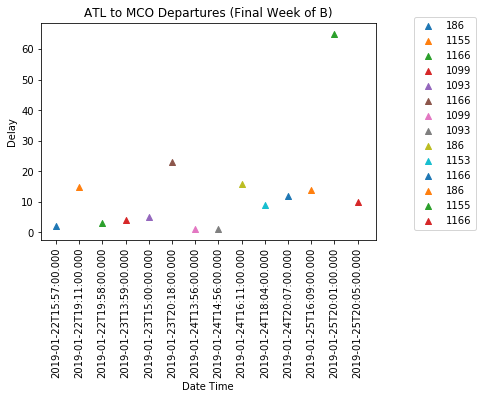

In [57]:

N = len(Range_B_MCO_Bound_df['Actual'])
fig, ax = plt.subplots()
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, N))
ax.set_xlabel('Date Time')
ax.set_ylabel('Delay')

for x,y,c,lb in zip(Range_B_MCO_Bound_df['Actual'], Range_B_MCO_Bound_df['Delay'], Range_B_MCO_Bound_df['Counter'], Range_B_MCO_Bound_df['Flight']):
    ax.scatter(x, y, marker='^', label=lb)
ax.legend(Range_B_MCO_Bound_df['Flight'],loc="best")
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.xticks(rotation='vertical')
plt.title("ATL to MCO Departures (Final Week of B)")
plt.show()